# Battle of the Neighborhoods - Portland Addition

The author currently lives in Southern California where Real Estate is simply out of his price range. He wishes to own a home so he can A) begin putting his money towards equity instead of rent and B) secure a home to live for himself and his family. However, in order to solve this problem, the following questions must be addressed: What neighborhoods would be within his price range? And of those neighborhoods within the author’s price range, which neighborhoods would be suitable to live based on crime statistics and nearby venues?

##### First, I install the necessary libraries

In [1]:
import numpy as np 
import pandas as pd

# Install lxml for scraping
!pip install lxml

# Library to handle JSON files
import json

# To convert addresses into latitude and longitude
    # On a side note I prefer using pip to conda since it is much faster
!pip install geopy
from geopy.geocoders import Nominatim

# Install geocoder
!pip install geocoder

#Installing arcGIS
!pip install arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import Point

import requests # import a library to hadle requests
from pandas.io.json import json_normalize # Used to transform JSON file into a pandas dataframe

# Importing Matplotlib for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from SciKit Learn
from sklearn.cluster import KMeans

# Install and import folium to render maps
!pip install folium
import folium

print('All libraries imported!')

     |████████████████████████████████| 5.8MB 26.4MB/s eta 0:00:01
     |████████████████████████████████| 102kB 12.3MB/s ta 0:00:01
     |████████████████████████████████| 102kB 20.3MB/s ta 0:00:01
     |████████████████████████████████| 829kB 43.5MB/s eta 0:00:01
     |████████████████████████████████| 81kB 27.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
     |████████████████████████████████| 1.7MB 25.2MB/s eta 0:00:01
     |████████████████████████████████| 6.4MB 28.7MB/s eta 0:00:01
     |████████████████████████████████| 194kB 48.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 24.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/58/42/77/cfff30ae9844b4fbf78a3df610bb4f83ae991ebec2c31ac1bd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/97/9b/01/5264bee79dd0e82e0801353004d0ebb7030c89a368212e9eb9
Successfully built ar

##### Retriving the file path to import the csv files

In [2]:
pwd

'/resources/labs/DP0701EN'

##### Then I import the csv files I will be working with

In [3]:
Neigh = pd.read_csv('/resources/labs/DP0701EN/Neighborhoods_Regions.csv')
Coal = pd.read_csv('/resources/labs/DP0701EN/Neighborhood_Coalitions_Regions.csv')
Crime = pd.read_csv('/resources/labs/DP0701EN/CrimeData-2019_PDX.csv')

# Check the shape of each dataframe
print("Neigh shape: ", Neigh.shape)
print("Coal shape: ", Coal.shape)
print("Crime shape: ", Crime.shape)

# Check using the .head() method to make sure my data has been imported
Neigh.head()

Neigh shape:  (98, 10)
Coal shape:  (13, 8)
Crime shape:  (43613, 14)


OBJECTID                            NAME COMMPLAN SHARED COALIT HORZ_VERT  \
0         1                  CATHEDRAL PARK                   NPNS      HORZ   
1         2                 UNIVERSITY PARK                   NPNS      HORZ   
2         3                        PIEDMONT   ALBINA          NPNS      VERT   
3         4                        WOODLAWN   ALBINA          NECN      HORZ   
4         5  CULLY ASSOCIATION OF NEIGHBORS                    CNN      HORZ   

                         MAPLABEL  ID  Shape_Length    Shape_Area  
0                  Cathedral Park  31  11434.254777  5.424298e+06  
1                 University Park  88  11950.859827  6.981457e+06  
2                        Piedmont  70  10849.327392  6.079530e+06  
3                        Woodlawn  93   8078.360994  3.870554e+06  
4  Cully Association of Neighbors  23  18179.392090  1.658062e+07

Scrape the housing data from Portland monthly then put it into a dataframe and check it using the .head() method.

In [5]:
scr_url = 'https://www.pdxmonthly.com/articles/2019/3/26/portland-neighborhoods-by-the-numbers-2019-the-city'
Homes = pd.read_html(scr_url)

In [6]:
Home_P= pd.DataFrame(data=Homes[0])
Home_P.head(3)

Neighborhood Average home sale price ($)  \
0                  ALAMEDA                      785713   
1              ARBOR LODGE                      465743   
2  ARDENWALD-JOHNSON CREEK                      418640   

  Median home sale price ($)  Average cost per square foot ($)  \
0                     738000                               268   
1                     459450                               252   
2                     434500                               185   

  Days on market (avg.)  Homes sold in 2018 (#) Condo sales (%)  \
0                    31                      81              0%   
1                    28                     132             13%   
2                    89                      10              0%   

  1-year median price change (2017â2018) (%)  \
0                                           8%   
1                                           1%   
2                                          -7%   

  5-year median price change (2014â2018) (%) Distressed property sales (%)  \
0                                          26%                            1%   
1                                          33%                            0%   
2                                          34%                           10%   

   ... Commute by public transit (%)  Commute by bike (%)  \
0  ...                           8.8                  3.9   
1  ...                          14.2                  3.6   
2  ...                           9.3                  0.4   

   Commute by walking (%)  Commute by biking and walking (%)  \
0                    11.0                               14.9   
1                    11.9                               15.6   
2                     7.3                                7.7   

   Number of Max/streetcar/tram lines  Number of TriMet bus lines  \
0                                   0                           3   
1                                   1                           4   
2                                   1                           5   

   Number of transit lines (bus/MAX/streetcar/tram)  \
0                                                 3   
1                                                 5   
2                                                 6   

   Miles of bike routes (lanes, boulevards, multiuse paths)  \
0                                                  1          
1                                                  6          
2                                                  3          

   Miles of bike routes (all) per square mile  Walk score  
0                                         1.2          65  
1                                         7.2          72  
2                                         7.8          54  

[3 rows x 57 columns]

Check the Coalition data using the .head() method

In [7]:
Coal.head(3)

OBJECTID COALIT SHARED                            NAME  \
0         1   NWNW               NEIGHBORS WEST/NORTHWEST   
1         2   EPCO         EAST PORTLAND COMMUNITY OFFICE   
2         3   SWNI          SOUTHWEST NEIGHBORHOODS, INC.   

                         MAPLABEL    ID  Shape_Length    Shape_Area  
0        Neighbors West/Northwest  1003  83599.300218  1.472801e+08  
1  East Portland Community Office  1002  77575.351343  1.642999e+08  
2   Southwest Neighborhoods, Inc.  1007  68041.461869  9.547462e+07

##### I clean the data set by getting rid of the columns that I don't need

In [8]:
# Selecting only the data that I need from my Data Sets
Coal_temp = Coal[['NAME', 'COALIT']]
Neigh_temp = Neigh[['NAME', 'COALIT', 'Shape_Area']]

# Renaming the columns I want to be able to call them easily
Home_P = Home_P.rename(columns={"Neighborhood": "NEIGHBORHOOD", "Average home sale price ($)": "AVG_PRICE", "Median home sale price ($)": "MED_PRICE", "Average cost per square foot ($)": "COST/SQ_FT"})

# Selecting the data that I need from Home_temp
Home_temp = Home_P[['NEIGHBORHOOD', 'AVG_PRICE', 'MED_PRICE', 'COST/SQ_FT']]

# Print the shape of of the above dataframes
print("Neigh_temp: ", Neigh_temp.shape)
print("Coal_temp: ", Coal_temp.shape)
print("Home_temp: ", Home_temp.shape)

# Preview Home_temp
Home_temp.head()

Neigh_temp:  (98, 3)
Coal_temp:  (13, 2)
Home_temp:  (96, 4)


NEIGHBORHOOD AVG_PRICE MED_PRICE  COST/SQ_FT
0                  ALAMEDA    785713    738000         268
1              ARBOR LODGE    465743    459450         252
2  ARDENWALD-JOHNSON CREEK    418640    434500         185
3                    ARGAY    391146    399750         168
4        ARLINGTON HEIGHTS   1012913    862500         306

##### I join the two data sets so that Coalition name is included

In [9]:
# Renameing the Name columns so to be able to join the data frams
Coal_temp = Coal_temp.rename(columns={"NAME": "COALITION_NAME"})

# Joining the dataframes using "COALIT" as the index
Neigh_Coal = Neigh_temp.set_index('COALIT').join(Coal_temp.set_index('COALIT'), how='inner')

# Finding the number of neighborhoods in the data frame
print(Neigh_Coal.shape)

# Renameing the column name to Neighborhood
Neigh_Coal = Neigh_Coal.rename(columns={"NAME": "NEIGHBORHOOD"})

# Calling the .tail() method to see the last five rows of the new dataframe
Neigh_Coal.tail()

(118, 3)


NEIGHBORHOOD    Shape_Area COALITION_NAME
COALIT                                                  
UNCLAIMED  MC UNCLAIMED #14  1.593599e+07            NaN
UNCLAIMED  MC UNCLAIMED #14  1.593599e+07            NaN
UNCLAIMED  MC UNCLAIMED #14  1.593599e+07            NaN
UNCLAIMED  MC UNCLAIMED #14  1.593599e+07            NaN
UNCLAIMED  MC UNCLAIMED #14  1.593599e+07            NaN

Looks like I can Eliminate the Neighborhoods that are unclaimed because it increased the size of the data set from 98 to 118, I'll reset the index as well.

In [10]:
# Reset the index
Neigh_Coal.reset_index(drop=False, inplace=True)

# Dropping unclaimed Neighborhoods
Neigh_Coal.dropna(subset=['COALITION_NAME'], inplace=True)

print(Neigh_Coal.shape)
Neigh_Coal.head()

(94, 4)


COALIT                     NEIGHBORHOOD    Shape_Area  \
0    CNN   CULLY ASSOCIATION OF NEIGHBORS  1.658062e+07   
1    CNN  SUMNER ASSOCIATION OF NEIGHBORS  4.179036e+06   
2    CNN                   ROSE CITY PARK  6.319334e+06   
3    CNN                    MADISON SOUTH  9.277968e+06   
4    CNN                          ROSEWAY  4.864649e+06   

                    COALITION_NAME  
0  CENTRAL NORTHEAST NEIGHBORHOODS  
1  CENTRAL NORTHEAST NEIGHBORHOODS  
2  CENTRAL NORTHEAST NEIGHBORHOODS  
3  CENTRAL NORTHEAST NEIGHBORHOODS  
4  CENTRAL NORTHEAST NEIGHBORHOODS

#### Add the homes data to the data frame

In [11]:
NCH = Neigh_Coal.set_index('NEIGHBORHOOD').join(Home_temp.set_index('NEIGHBORHOOD'))
NCH.reset_index(drop=False, inplace=True)
print(NCH.shape)
NCH.head()

(94, 7)


NEIGHBORHOOD COALIT    Shape_Area  \
0   CULLY ASSOCIATION OF NEIGHBORS    CNN  1.658062e+07   
1  SUMNER ASSOCIATION OF NEIGHBORS    CNN  4.179036e+06   
2                   ROSE CITY PARK    CNN  6.319334e+06   
3                    MADISON SOUTH    CNN  9.277968e+06   
4                          ROSEWAY    CNN  4.864649e+06   

                    COALITION_NAME AVG_PRICE MED_PRICE  COST/SQ_FT  
0  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  
1  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  
2  CENTRAL NORTHEAST NEIGHBORHOODS    524570    502350       236.0  
3  CENTRAL NORTHEAST NEIGHBORHOODS    381419    365000       214.0  
4  CENTRAL NORTHEAST NEIGHBORHOODS    428144    407500       236.0

I get the coordinates for each of the neighborhoods

In [12]:
import geocoder # Import geocoder

Lat_list=[]
Lng_list=[]

for i in range(NCH.shape[0]):
    address='{}, Portland, Oregon'.format(NCH.at[i,'NEIGHBORHOOD'])
    g = geocoder.arcgis(address)
    Lat_list.append(g.latlng[0])
    Lng_list.append(g.latlng[1])

I then add the longitude and latitude for each neighborhood

In [13]:
PDX_temp = NCH
PDX_temp['LATITUDE'] = Lat_list
PDX_temp['LONGITUDE'] = Lng_list
PDX_temp.head()

NEIGHBORHOOD COALIT    Shape_Area  \
0   CULLY ASSOCIATION OF NEIGHBORS    CNN  1.658062e+07   
1  SUMNER ASSOCIATION OF NEIGHBORS    CNN  4.179036e+06   
2                   ROSE CITY PARK    CNN  6.319334e+06   
3                    MADISON SOUTH    CNN  9.277968e+06   
4                          ROSEWAY    CNN  4.864649e+06   

                    COALITION_NAME AVG_PRICE MED_PRICE  COST/SQ_FT  LATITUDE  \
0  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  45.56276   
1  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  45.55865   
2  CENTRAL NORTHEAST NEIGHBORHOODS    524570    502350       236.0  45.53903   
3  CENTRAL NORTHEAST NEIGHBORHOODS    381419    365000       214.0  45.54122   
4  CENTRAL NORTHEAST NEIGHBORHOODS    428144    407500       236.0  45.54962   

   LONGITUDE  
0 -122.60120  
1 -122.57233  
2 -122.60636  
3 -122.57646  
4 -122.58731

##### Now I add the crime data
Let's take a look at it first

In [14]:
Crime.head(3)

Address   CaseNumber CrimeAgainst Neighborhood OccurDate  OccurTime  \
0     NaN  19-X5232712       Person        Lents  1/1/2019        615   
1     NaN  19-X5232715       Person   Montavilla  1/1/2019        540   
2     NaN  19-X5232741       Person     Glenfair  1/1/2019         52   

    OffenseCategory     OffenseType  OpenDataLat  OpenDataLon  OpenDataX  \
0  Assault Offenses  Simple Assault          NaN          NaN        NaN   
1  Assault Offenses  Simple Assault          NaN          NaN        NaN   
2  Assault Offenses  Simple Assault          NaN          NaN        NaN   

   OpenDataY ReportDate  OffenseCount  
0        NaN   1/1/2019             1  
1        NaN   1/1/2019             1  
2        NaN   1/1/2019             1

I keep only the Neighborhood, Offense Category, and Offense Count

In [15]:
Crime_temp = Crime[['Neighborhood', 'OffenseCategory', 'OffenseCount']]

# Getting the size of the Crime_temp dataframe
print(Crime_temp.shape)

# Counting the number of offences by category
print(Crime_temp['OffenseCategory'].value_counts())

# Checking the dataframe
Crime_temp.head()

(43613, 3)
Larceny Offenses                18014
Assault Offenses                 6147
Motor Vehicle Theft              4833
Vandalism                        4612
Burglary                         3150
Fraud Offenses                   2563
Drug/Narcotic Offenses           1336
Robbery                           741
Counterfeiting/Forgery            591
Weapon Law Violations             515
Sex Offenses                      497
Arson                             199
Embezzlement                      118
Stolen Property Offenses           66
Pornography/Obscene Material       46
Prostitution Offenses              40
Kidnapping/Abduction               30
Homicide Offenses                  28
Animal Cruelty Offenses            27
Extortion/Blackmail                21
Human Trafficking Offenses         19
Sex Offenses, Nonforcible          17
Bribery                             3
Name: OffenseCategory, dtype: int64


Neighborhood   OffenseCategory  OffenseCount
0        Lents  Assault Offenses             1
1   Montavilla  Assault Offenses             1
2     Glenfair  Assault Offenses             1
3     Glenfair  Assault Offenses             1
4        Eliot  Assault Offenses             1

Let's add a weighting based on the Offense Category

In [16]:
Offenses = Crime_temp['OffenseCategory'].unique()
print(len(Offenses))
Offenses[0:]

23


array(['Assault Offenses', 'Sex Offenses', 'Human Trafficking Offenses',
       'Vandalism', 'Larceny Offenses', 'Weapon Law Violations',
       'Burglary', 'Motor Vehicle Theft', 'Robbery',
       'Drug/Narcotic Offenses', 'Homicide Offenses',
       'Pornography/Obscene Material', 'Fraud Offenses',
       'Kidnapping/Abduction', 'Animal Cruelty Offenses',
       'Sex Offenses, Nonforcible', 'Counterfeiting/Forgery',
       'Prostitution Offenses', 'Extortion/Blackmail', 'Bribery', 'Arson',
       'Embezzlement', 'Stolen Property Offenses'], dtype=object)

In [17]:
# Create a weighting based on my subjective interpretation of the severity of the crime
Weighting = np.array([3, 5, 5, 1, 1, 1, 4, 4, 4, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 1, 3, 1, 2])

# Check to make sure both arrays are the same length
print(len(Weighting))
print(len(Offenses))

# Push the arrays to a new dataframe called "Weights"
Weights = pd.DataFrame({"OffenseCategory": Offenses, 
                        "Weighting": Weighting})

# Preview the table
Weights.head(3)

23
23


OffenseCategory  Weighting
0            Assault Offenses          3
1                Sex Offenses          5
2  Human Trafficking Offenses          5

Let's join the Weighting and the Crime_temp and Weights table

In [18]:
ct = Crime_temp.set_index('OffenseCategory')
w = Weights.set_index("OffenseCategory")
Crime_temp = ct.join(w)
Crime_temp.reset_index(drop=False, inplace=True)
print(Crime_temp.shape)
Crime_temp.head(3)

(43613, 4)


OffenseCategory    Neighborhood  OffenseCount  Weighting
0  Animal Cruelty Offenses           Cully             1          2
1  Animal Cruelty Offenses  Cathedral Park             1          2
2  Animal Cruelty Offenses       Sunnyside             1          2

I multiply the Weighting by the counts

In [19]:
Crime_temp['Weighted'] = Crime_temp['OffenseCount'] * Crime_temp['Weighting']
Crime_temp.head(3)

OffenseCategory    Neighborhood  OffenseCount  Weighting  Weighted
0  Animal Cruelty Offenses           Cully             1          2         2
1  Animal Cruelty Offenses  Cathedral Park             1          2         2
2  Animal Cruelty Offenses       Sunnyside             1          2         2

Now I want to create a data set that lists the total number of incidents in each neighborhood

In [20]:
Crime_counts = Crime_temp.groupby(['Neighborhood'])['Weighted'].sum()
Crime_counts

Neighborhood
Alameda               177
Arbor Lodge           811
Ardenwald              64
Argay                 981
Arlington Heights      84
                     ... 
West Portland Park    321
Wilkes                850
Woodland Park          51
Woodlawn              462
Woodstock             705
Name: Weighted, Length: 96, dtype: int64

I convert the above data into a dataframe

In [21]:
# Send the data to a dataframe
CC = pd.DataFrame(data=Crime_counts)

# Reset the index (this will help when I join it with the rest of my data)
CC.reset_index(drop=False, inplace=True)

# I rename Offence count to be consistent with the rest of the data
CC = CC.rename(columns={"Weighted": "WT_OFFENSE_CT"})

# I create a column that has the Neighboorhood in all caps just like the rest of my data
CC['NEIGHBORHOOD'] = CC['Neighborhood'].apply(lambda x: x.upper())

# I drop the old Neighborhood column
CC = CC.drop(columns=['Neighborhood'])

# I take a look at the resulting dataframe
CC.head()

WT_OFFENSE_CT       NEIGHBORHOOD
0            177            ALAMEDA
1            811        ARBOR LODGE
2             64          ARDENWALD
3            981              ARGAY
4             84  ARLINGTON HEIGHTS

I then join the two data sets together into a new dataframe called PDX_df

In [22]:
PDX_df = PDX_temp.set_index('NEIGHBORHOOD').join(CC.set_index('NEIGHBORHOOD'))
PDX_df.reset_index(drop=False, inplace=True)
print(PDX_df.shape)
PDX_df.head()

(94, 10)


NEIGHBORHOOD COALIT    Shape_Area  \
0   CULLY ASSOCIATION OF NEIGHBORS    CNN  1.658062e+07   
1  SUMNER ASSOCIATION OF NEIGHBORS    CNN  4.179036e+06   
2                   ROSE CITY PARK    CNN  6.319334e+06   
3                    MADISON SOUTH    CNN  9.277968e+06   
4                          ROSEWAY    CNN  4.864649e+06   

                    COALITION_NAME AVG_PRICE MED_PRICE  COST/SQ_FT  LATITUDE  \
0  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  45.56276   
1  CENTRAL NORTHEAST NEIGHBORHOODS       NaN       NaN         NaN  45.55865   
2  CENTRAL NORTHEAST NEIGHBORHOODS    524570    502350       236.0  45.53903   
3  CENTRAL NORTHEAST NEIGHBORHOODS    381419    365000       214.0  45.54122   
4  CENTRAL NORTHEAST NEIGHBORHOODS    428144    407500       236.0  45.54962   

   LONGITUDE  WT_OFFENSE_CT  
0 -122.60120            NaN  
1 -122.57233            NaN  
2 -122.60636          915.0  
3 -122.57646         1203.0  
4 -122.58731          596.0

Now I reoder the data and drop a few columns

In [23]:
PDX_df = PDX_df[['NEIGHBORHOOD', 'COALITION_NAME', 'AVG_PRICE', 'MED_PRICE', 'COST/SQ_FT', 'WT_OFFENSE_CT', 'LATITUDE', 'LONGITUDE', 'Shape_Area']]
PDX_df.head()

NEIGHBORHOOD                   COALITION_NAME AVG_PRICE  \
0   CULLY ASSOCIATION OF NEIGHBORS  CENTRAL NORTHEAST NEIGHBORHOODS       NaN   
1  SUMNER ASSOCIATION OF NEIGHBORS  CENTRAL NORTHEAST NEIGHBORHOODS       NaN   
2                   ROSE CITY PARK  CENTRAL NORTHEAST NEIGHBORHOODS    524570   
3                    MADISON SOUTH  CENTRAL NORTHEAST NEIGHBORHOODS    381419   
4                          ROSEWAY  CENTRAL NORTHEAST NEIGHBORHOODS    428144   

  MED_PRICE  COST/SQ_FT  WT_OFFENSE_CT  LATITUDE  LONGITUDE    Shape_Area  
0       NaN         NaN            NaN  45.56276 -122.60120  1.658062e+07  
1       NaN         NaN            NaN  45.55865 -122.57233  4.179036e+06  
2    502350       236.0          915.0  45.53903 -122.60636  6.319334e+06  
3    365000       214.0         1203.0  45.54122 -122.57646  9.277968e+06  
4    407500       236.0          596.0  45.54962 -122.58731  4.864649e+06

Let's check to see how many neighborhoods missing values there are for Median Price and Weighted Offense Counts

In [24]:
print(PDX_df['MED_PRICE'].isnull().sum())
print(PDX_df['WT_OFFENSE_CT'].isnull().sum())

24
25


It looks like they have about as many missing incidents as they do Median home price, perhaps it is best to drop this data, but lets take a look at it first, just to be sure

Before I do that, let me make sure the data types are correct

In [25]:
PDX_df.dtypes

NEIGHBORHOOD       object
COALITION_NAME     object
AVG_PRICE          object
MED_PRICE          object
COST/SQ_FT        float64
WT_OFFENSE_CT     float64
LATITUDE          float64
LONGITUDE         float64
Shape_Area        float64
dtype: object

In [26]:
# Change the data types from objects to floats
mp = PDX_df["MED_PRICE"].astype(float)
PDX_df['MED_PRICE'] = mp
ap = PDX_df["AVG_PRICE"].astype(float)
PDX_df['AVG_PRICE'] = ap

print(PDX_df.dtypes)

# Weighting the incidents of crime by area of the neighborhood to get crime density
PDX_df['CRIME_SCORE'] = PDX_df['WT_OFFENSE_CT']/PDX_df['Shape_Area']

# Normalizing the crime data 
PDX_df['CRIME_SCORE'] = (PDX_df['CRIME_SCORE']/PDX_df['CRIME_SCORE'].max())*100

# Round the normalized data to two decimal places
PDX_df = PDX_df.round({'CRIME_SCORE': 2})

# Copy the dataframe
PDX2 = PDX_df.copy()

# Dropping Neighborhoods with no price data
PDX2.dropna(subset=['AVG_PRICE', 'MED_PRICE'], inplace=True)

# Putting NaN data into another dataframe
PDX_NA = PDX_df.copy()
PDX_NA = PDX_NA[['NEIGHBORHOOD', 'COALITION_NAME', 'MED_PRICE', 'CRIME_SCORE', 'LATITUDE', 'LONGITUDE']]
PDX_NA['MED_PRICE'].fillna(0, inplace=True)
PDX_NA = PDX_NA[PDX_NA['MED_PRICE'] == 0]
PDX_NA['MED_PRICE'] = 'NaN'
PDX_NA.reset_index(drop=True, inplace=True)

# Dropping the Offence Count column
PDX2.drop(columns=['WT_OFFENSE_CT'])

# Reordering the data
PDX2 = PDX2[['NEIGHBORHOOD', 'COALITION_NAME', 'MED_PRICE', 'COST/SQ_FT', 'CRIME_SCORE', 'LATITUDE', 'LONGITUDE']]

# Returning the size of the old and new dataframe
print(PDX_df.shape)
print(PDX2.shape)

# Counting the number of crime score rows with NaN
print(PDX2['CRIME_SCORE'].isnull().sum())

# Where crime score is NaN I set them to 0
PDX2['CRIME_SCORE'].fillna(0, inplace=True)

# Reset the index
PDX2.reset_index(drop=True, inplace=True)

# Check the new dataframe
print(PDX2.dtypes)
PDX2.head()

NEIGHBORHOOD       object
COALITION_NAME     object
AVG_PRICE         float64
MED_PRICE         float64
COST/SQ_FT        float64
WT_OFFENSE_CT     float64
LATITUDE          float64
LONGITUDE         float64
Shape_Area        float64
dtype: object
(94, 10)
(70, 7)
2
NEIGHBORHOOD       object
COALITION_NAME     object
MED_PRICE         float64
COST/SQ_FT        float64
CRIME_SCORE       float64
LATITUDE          float64
LONGITUDE         float64
dtype: object


NEIGHBORHOOD                   COALITION_NAME  MED_PRICE  COST/SQ_FT  \
0     ROSE CITY PARK  CENTRAL NORTHEAST NEIGHBORHOODS   502350.0       236.0   
1      MADISON SOUTH  CENTRAL NORTHEAST NEIGHBORHOODS   365000.0       214.0   
2            ROSEWAY  CENTRAL NORTHEAST NEIGHBORHOODS   407500.0       236.0   
3  BEAUMONT-WILSHIRE  CENTRAL NORTHEAST NEIGHBORHOODS   651000.0       279.0   
4          HOLLYWOOD  CENTRAL NORTHEAST NEIGHBORHOODS   650250.0       275.0   

   CRIME_SCORE  LATITUDE  LONGITUDE  
0        26.31  45.53903 -122.60636  
1        23.56  45.54122 -122.57646  
2        22.26  45.54962 -122.58731  
3        11.04  45.54966 -122.62441  
4       100.00  45.53560 -122.62112

Visualizing the Null data

In [26]:
print(PDX_NA['CRIME_SCORE'].isnull().sum())
print(PDX_NA.shape)
PDX_NA.head()

23
(24, 6)


NEIGHBORHOOD                   COALITION_NAME  \
0             CULLY ASSOCIATION OF NEIGHBORS  CENTRAL NORTHEAST NEIGHBORHOODS   
1            SUMNER ASSOCIATION OF NEIGHBORS  CENTRAL NORTHEAST NEIGHBORHOODS   
2        SUNDERLAND ASSOCIATION OF NEIGHBORS  CENTRAL NORTHEAST NEIGHBORHOODS   
3  PARKROSE HEIGHTS ASSOCIATION OF NEIGHBORS   EAST PORTLAND COMMUNITY OFFICE   
4           CENTENNIAL COMMUNITY ASSOCIATION   EAST PORTLAND COMMUNITY OFFICE   

  MED_PRICE  WEIGHTED_INCIDENTS  LATITUDE  LONGITUDE  
0       NaN                 NaN  45.56276 -122.60120  
1       NaN                 NaN  45.55865 -122.57233  
2       NaN                 NaN  45.58096 -122.63331  
3       NaN                 NaN  45.53348 -122.54583  
4       NaN                 NaN  45.50445 -122.50033

So, 23 of the 24 Neighborhoods without a median price do not have any crime incidents. No crime and no data for median home price is an indication of an absence of human activity; therefore, I believe it is safe to drop these neighborhoods from our data set.

### Visualizing the Data
Now I will look at a couple of maps to get an idea of housing prices and crime in these neighborhoods.

First, I import the json neighborhood file

In [27]:
!wget -q -O 'portland_data.json' https://opendata.arcgis.com/datasets/9f50a605cf4945259b983fa35c993fe9_125.geojson
print('Data downloaded!')

Data downloaded!


Next I get the geocoordinates for Portland

In [28]:
gis = GIS()
address = "Portland, Oregon"
location = geocode(address)[0]
pld = location['location']
lat_PDX = pld['y']
lng_PDX = pld['x']
print('The coordinates for Portland are {}, {}.'.format(lat_PDX, lng_PDX))

The coordinates for Portland are 45.511790000000076, -122.67562999999996.


Finally, I Visualize the housing data

In [29]:
lat1 = lat_PDX
lng1 = lng_PDX

PDX_geojson = r'portland_data.json'

# create map of Portland using latitude and longitude values

REmap_PDX = folium.Map(location=[lat1, lng1], zoom_start=11)

REmap_PDX.choropleth(geo_data=PDX_geojson,
                  data=PDX2, columns=['NEIGHBORHOOD', 'MED_PRICE'], 
                  key_on='feature.properties.NAME',
                  fill_color='Reds',
                  fill_opacity=0.9, 
                  line_opacity=0.3, 
                  legend_name='Housing Prices Portland')

REmap_PDX

Now lest Visualize the Crime Data

In [30]:
REmap_Cr = folium.Map(location=[lat1, lng1], zoom_start=11)

REmap_Cr.choropleth(geo_data=PDX_geojson, data=PDX2, columns=['NEIGHBORHOOD', 'CRIME_SCORE'], key_on='feature.properties.NAME', 
                     fill_color='Blues', fill_opacity=0.9, line_opacity=0.3, legend_name='Crime Density Portland')

REmap_Cr

#### Filtering the Neighborhoods based on my Price Range
I will eliminate any neighborhoods that have a median price range of more than 500,000 dollars. My target price is somewhere around 400,000 dollars, so eliminating neighborhoods with a median price of more than 500,000 dollars should allow me to hit my target price as it is likely that there will be some home below the median price.

In [31]:
ns = []
def GoodPrice(Price):
    if Price > 500000:
        ns = 0
    else:
        if Price == 0:
            ns = 0
        else:
            ns = 1
    return ns

# Check the function
GoodPrice(500)

1

Now Create a row called N_Score to for neighborhoods that fit my criteria

In [32]:
PDX2['N_SCORE'] = PDX2.apply(lambda row: GoodPrice(row['MED_PRICE']),axis=1)

Lets see where these neighborhoods are on the map

In [33]:
Neigh_PDX = folium.Map(location=[lat1, lng1], zoom_start=11)

Neigh_PDX.choropleth(geo_data=PDX_geojson,
                  data=PDX2, columns=['NEIGHBORHOOD', 'N_SCORE'], 
                  key_on='feature.properties.NAME',
                  fill_color='Reds',
                  fill_opacity=0.9, 
                  line_opacity=0.3, 
                  legend_name='Housing Prices Portland')

Neigh_PDX

Now let's do the same with crime. Let's look at the numbers first.

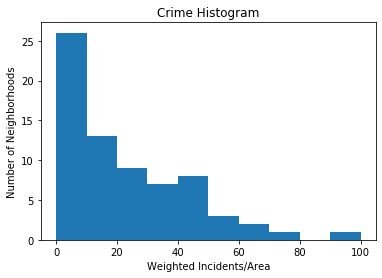

In [34]:
wi = PDX2['CRIME_SCORE'].to_numpy()
wi
from matplotlib import pyplot as plt   
    
plt.hist(wi, bins = [0,10,20,30,40,50,60,70,80,90,100]) 
plt.xlabel("Weighted Incidents/Area")
plt.ylabel("Number of Neighborhoods")
plt.title("Crime Histogram") 
plt.show()

It looks like the data is skewed to the left which is good for me, because it means that there are more neighborhoods with low crime incidents than ones with high ones. This also means I can be selective with the neighborhoods I choose. Therefore; I will take neighborhoods that have a crime score of less than 20.

In [37]:
# Build a function to separate the neighborhoods witha crime score of less than 20
cs = []
def LwCrm(Weight):
    if Weight < 20:
        cs = 1
    else:
        cs = 0
    return cs

# Check the function
LwCrm(40)

0

Applying the function to the dataframe

In [38]:
PDX2['C_SCORE'] = PDX2.apply(lambda row: LwCrm(row['CRIME_SCORE']),axis=1)
PDX2.head(3)

NEIGHBORHOOD                   COALITION_NAME  MED_PRICE  COST/SQ_FT  \
0  ROSE CITY PARK  CENTRAL NORTHEAST NEIGHBORHOODS   502350.0       236.0   
1   MADISON SOUTH  CENTRAL NORTHEAST NEIGHBORHOODS   365000.0       214.0   
2         ROSEWAY  CENTRAL NORTHEAST NEIGHBORHOODS   407500.0       236.0   

   CRIME_SCORE  LATITUDE  LONGITUDE  N_SCORE  C_SCORE  
0        26.31  45.53903 -122.60636        0        0  
1        23.56  45.54122 -122.57646        1        0  
2        22.26  45.54962 -122.58731        1        0

Visualizing which neighborhoods are within the crime threshold set above.

In [39]:
map_Cr = folium.Map(location=[lat1, lng1], zoom_start=11)

map_Cr.choropleth(geo_data=PDX_geojson, data=PDX2, columns=['NEIGHBORHOOD', 'C_SCORE'], key_on='feature.properties.NAME', 
                     fill_color='Blues', fill_opacity=0.9, line_opacity=0.3, legend_name='Low-Crime Portland')

map_Cr

Now let's find the neighborhoods that are both low-crime and within my price-range. To do this I will multibply the N_Score by the C_Score.

In [40]:
PDX2['TOT_SCORE'] = PDX2['N_SCORE']*PDX2['C_SCORE']
PDX2.head(3)

NEIGHBORHOOD                   COALITION_NAME  MED_PRICE  COST/SQ_FT  \
0  ROSE CITY PARK  CENTRAL NORTHEAST NEIGHBORHOODS   502350.0       236.0   
1   MADISON SOUTH  CENTRAL NORTHEAST NEIGHBORHOODS   365000.0       214.0   
2         ROSEWAY  CENTRAL NORTHEAST NEIGHBORHOODS   407500.0       236.0   

   CRIME_SCORE  LATITUDE  LONGITUDE  N_SCORE  C_SCORE  TOT_SCORE  
0        26.31  45.53903 -122.60636        0        0          0  
1        23.56  45.54122 -122.57646        1        0          0  
2        22.26  45.54962 -122.58731        1        0          0

I then visualize the neighborhoods that have an acceptable total score

In [41]:
map_tot = folium.Map(location=[lat1, lng1], zoom_start=11)

map_tot.choropleth(geo_data=PDX_geojson, data=PDX2, columns=['NEIGHBORHOOD', 'TOT_SCORE'], key_on='feature.properties.NAME', 
                     fill_color='Greens', fill_opacity=0.9, line_opacity=0.2, legend_name='Selected Neighborhoods Portland')

map_tot

In [42]:
PDX2['TOT_SCORE'].sum()

20

So there are 20 neighborhoods to choose from. Let's list out those neighborhoods by dropping the neighborhoods that did not meet my threshold

In [43]:
PDX_can = PDX2[['NEIGHBORHOOD', 'TOT_SCORE', 'LATITUDE', 'LONGITUDE', 'MED_PRICE', 'COST/SQ_FT', 'CRIME_SCORE']].copy()
PDX_can['TOT_SCORE'].replace(0, np.NaN, inplace=True)
PDX_can.dropna(subset=['TOT_SCORE'], inplace=True)
PDX_can.reset_index(drop=True, inplace=True)
n_names = PDX_can['NEIGHBORHOOD'].to_numpy()
n_names
LatP = PDX_can['LATITUDE'].to_numpy()
LngP = PDX_can['LATITUDE'].to_numpy()
print(LatP)
print(LngP)

[45.53354    45.47622    45.58828    45.57666    45.55623    45.60847
 45.58171    45.59169    45.60032    45.47609955 45.47916    45.54976727
 45.48215    45.51179    45.46857    45.46182    45.45832    45.4475
 45.45483    45.45473   ]
[45.53354    45.47622    45.58828    45.57666    45.55623    45.60847
 45.58171    45.59169    45.60032    45.47609955 45.47916    45.54976727
 45.48215    45.51179    45.46857    45.46182    45.45832    45.4475
 45.45483    45.45473   ]


### Applying Machine Learning to the data

Let's explore the venues in these neighborhoods then apply kmeans to them. First I must input my credentials.

In [44]:
CLIENT_ID = 'K2OCBPS13FKSMRXVKIDTJA2X5IXTIJJQCHZXYR2C3XJCYM4L' # your Foursquare ID
CLIENT_SECRET = 'ACXBRUJBOVWENZLNSBEV23WI3RCVD4EHJF0DXBFUUS1H5IGH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K2OCBPS13FKSMRXVKIDTJA2X5IXTIJJQCHZXYR2C3XJCYM4L
CLIENT_SECRET:ACXBRUJBOVWENZLNSBEV23WI3RCVD4EHJF0DXBFUUS1H5IGH


I define the function getNearbyVenues in order to create a dataframe of nearby venues for the selected neighborhoods. I will set the radius to 1000 meters because 1 KM is about a 10-15 minute walk.

In [45]:
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng, in zip(names, latitudes, longitudes):
        print(name)
        
    # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat,
            lng,
            VERSION,
            radius,
            LIMIT)
    
    # Make a GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # Return the relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                            'Neighborhood Latitude',
                            'Neighborhood Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return(nearby_venues)

Now I apply the function above to the Neighborhoods I have selected as candidates

In [46]:
PDX_venues = getNearbyVenues(names=PDX_can['NEIGHBORHOOD'], latitudes=PDX_can['LATITUDE'], longitudes=PDX_can['LONGITUDE'])

RUSSELL
PLEASANT VALLEY
CATHEDRAL PARK
UNIVERSITY PARK
OVERLOOK
ST. JOHNS
KENTON
EAST COLUMBIA
LINNTON
ARDENWALD-JOHNSON CREEK
WOODSTOCK
SOUTH PORTLAND
HAYHURST
MULTNOMAH
SOUTH BURLINGAME
MARKHAM
COLLINS VIEW
WEST PORTLAND PARK
ASHCREEK
CRESTWOOD


I check the shape of the resulting dataframe and the first 3 rows using the .head() method.

In [47]:
print(PDX_venues.shape)
PDX_venues.head(3)

(523, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      RUSSELL               45.53354              -122.52592   
1      RUSSELL               45.53354              -122.52592   
2      RUSSELL               45.53354              -122.52592   

                    Venue  Venue Latitude  Venue Longitude Venue Category  
0               MOD Pizza       45.534170      -122.535885    Pizza Place  
1  Glendoveer Golf Course       45.527104      -122.519669    Golf Course  
2       Von Ebert Brewing       45.527036      -122.518295     Restaurant

I check to see how many venues were returned for each neighborhood

In [48]:
PDX_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
ARDENWALD-JOHNSON CREEK                      4                       4      4   
ASHCREEK                                     7                       7      7   
CATHEDRAL PARK                              49                      49     49   
COLLINS VIEW                                11                      11     11   
CRESTWOOD                                   21                      21     21   
EAST COLUMBIA                                5                       5      5   
HAYHURST                                    24                      24     24   
KENTON                                      52                      52     52   
LINNTON                                      7                       7      7   
MARKHAM                                     32                      32     32   
MULTNOMAH                                  100                     100    100   
OVERLOOK                                    19                      19     19   
PLEASANT VALLEY                              6                       6      6   
RUSSELL                                     25                      25     25   
SOUTH BURLINGAME                            29                      29     29   
SOUTH PORTLAND                              10                      10     10   
ST. JOHNS                                    4                       4      4   
UNIVERSITY PARK                             32                      32     32   
WEST PORTLAND PARK                          28                      28     28   
WOODSTOCK                                   58                      58     58   

                         Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                              
ARDENWALD-JOHNSON CREEK               4                4               4  
ASHCREEK                              7                7               7  
CATHEDRAL PARK                       49               49              49  
COLLINS VIEW                         11               11              11  
CRESTWOOD                            21               21              21  
EAST COLUMBIA                         5                5               5  
HAYHURST                             24               24              24  
KENTON                               52               52              52  
LINNTON                               7                7               7  
MARKHAM                              32               32              32  
MULTNOMAH                           100              100             100  
OVERLOOK                             19               19              19  
PLEASANT VALLEY                       6                6               6  
RUSSELL                              25               25              25  
SOUTH BURLINGAME                     29               29              29  
SOUTH PORTLAND                       10               10              10  
ST. JOHNS                             4                4               4  
UNIVERSITY PARK                      32               32              32  
WEST PORTLAND PARK                   28               28              28  
WOODSTOCK                            58               58              58

I check to see how many unique venues there are in the neighborhoods I have selected

In [47]:
print("There are {} unique venues within the selected neighborhoods in Portland.".format(len(PDX_venues['Venue Category'].unique())))

There are 168 unique venues within the selected neighborhoods in Portland.


### Analysis of Neighborhoods
Now it is time to analyze the neighborhoods. I do this by introducing dummy variables to the data.

In [49]:
# One hot encoding
PDX_onehot = pd.get_dummies(PDX_venues[['Venue Category']], prefix="", prefix_sep="")

# I add the neighborhood column back to the dataframe
PDX_onehot['Neighborhood'] = PDX_venues['Neighborhood']

# I move the neighborhood column to the front of the dataframe
fixed_columns = [PDX_onehot.columns[-1]] + list(PDX_onehot.columns[:-1])
PDX_onehot = PDX_onehot[fixed_columns]

# Check the shape and the first few rows of the dataframe
print(PDX_onehot.shape)
PDX_onehot.head(3)

(523, 169)


Neighborhood  ATM  Airport  American Restaurant  Antique Shop  Art Gallery  \
0      RUSSELL    0        0                    0             0            0   
1      RUSSELL    0        0                    0             0            0   
2      RUSSELL    0        0                    0             0            0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   

   ...  Thrift / Vintage Store  Track  Trail  Vegetarian / Vegan Restaurant  \
0  ...                       0      0      0                              0   
1  ...                       0      0      0                              0   
2  ...                       0      0      0                              0   

   Video Store  Vietnamese Restaurant  Waterfront  Wine Bar  Wings Joint  \
0            0                      0           0         0            0   
1            0                      0           0         0            0   
2            0                      0           0         0            0   

   Yoga Studio  
0            0  
1            0  
2            0  

[3 rows x 169 columns]

I group the rows by neighborhood and take the mean of the frequency of occurrance for each category and check the shape

In [50]:
PDX_grouped = PDX_onehot.groupby('Neighborhood').mean()

# Adding Median Price and Weighted Incidents back in to be considered by K-Means
PDX_temp = PDX_can[['NEIGHBORHOOD', 'MED_PRICE', 'COST/SQ_FT', 'CRIME_SCORE']].copy()

# Renaming the neighborhood column so the two dataframes align
PDX_temp = PDX_temp.rename(columns={'NEIGHBORHOOD': 'Neighborhood'})

# Merging the dataframes
PDX_grouped = PDX_grouped.join(PDX_temp.set_index('Neighborhood'), on='Neighborhood', how='right')

# Reseting the index column
PDX_grouped.reset_index(drop=False, inplace=True)

# Replacing NaNs with 0s
PDX_grouped.fillna(0, inplace=True)

# Checking dataframe shape
print(PDX_grouped.shape)

# Copy PDX_grouped and drop Median Price and Crime Score to analyze the top venues
# I will use Median price and Crime Score in my K-Means analysis
PDX_grouped2 = PDX_grouped[['Neighborhood', 'MED_PRICE', 'COST/SQ_FT', 'CRIME_SCORE']].copy()
PDX_grouped = PDX_grouped.drop(columns={'MED_PRICE', 'COST/SQ_FT', 'CRIME_SCORE'})

# Check the dataframe
PDX_grouped

(20, 172)


Neighborhood       ATM   Airport  American Restaurant  \
0   ARDENWALD-JOHNSON CREEK  0.000000  0.000000             0.000000   
1                  ASHCREEK  0.000000  0.000000             0.000000   
2            CATHEDRAL PARK  0.020408  0.000000             0.000000   
3              COLLINS VIEW  0.000000  0.000000             0.000000   
4                 CRESTWOOD  0.000000  0.000000             0.000000   
5             EAST COLUMBIA  0.000000  0.000000             0.000000   
6                  HAYHURST  0.000000  0.000000             0.000000   
7                    KENTON  0.019231  0.000000             0.000000   
8                   LINNTON  0.000000  0.000000             0.000000   
9                   MARKHAM  0.000000  0.000000             0.000000   
10                MULTNOMAH  0.000000  0.000000             0.020000   
11                 OVERLOOK  0.000000  0.000000             0.000000   
12          PLEASANT VALLEY  0.000000  0.000000             0.000000   
13                  RUSSELL  0.000000  0.000000             0.040000   
14         SOUTH BURLINGAME  0.034483  0.034483             0.000000   
15           SOUTH PORTLAND  0.000000  0.000000             0.000000   
16                ST. JOHNS  0.000000  0.000000             0.000000   
17          UNIVERSITY PARK  0.000000  0.000000             0.000000   
18       WEST PORTLAND PARK  0.000000  0.000000             0.035714   
19                WOODSTOCK  0.017241  0.000000             0.000000   

    Antique Shop  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0.000000     0.000000        0.00              0.00000   
1       0.000000     0.000000        0.00              0.00000   
2       0.000000     0.000000        0.00              0.00000   
3       0.000000     0.000000        0.00              0.00000   
4       0.000000     0.000000        0.00              0.00000   
5       0.000000     0.000000        0.00              0.00000   
6       0.000000     0.000000        0.00              0.00000   
7       0.038462     0.019231        0.00              0.00000   
8       0.000000     0.000000        0.00              0.00000   
9       0.000000     0.000000        0.00              0.00000   
10      0.000000     0.000000        0.01              0.00000   
11      0.000000     0.000000        0.00              0.00000   
12      0.000000     0.000000        0.00              0.00000   
13      0.000000     0.000000        0.00              0.00000   
14      0.000000     0.000000        0.00              0.00000   
15      0.000000     0.000000        0.00              0.00000   
16      0.000000     0.000000        0.00              0.00000   
17      0.000000     0.000000        0.00              0.03125   
18      0.000000     0.000000        0.00              0.00000   
19      0.000000     0.000000        0.00              0.00000   

    Arts & Entertainment  Asian Restaurant  ...  Thrift / Vintage Store  \
0               0.000000          0.000000  ...                0.000000   
1               0.000000          0.000000  ...                0.000000   
2               0.020408          0.000000  ...                0.000000   
3               0.000000          0.000000  ...                0.000000   
4               0.000000          0.000000  ...                0.000000   
5               0.000000          0.000000  ...                0.000000   
6               0.000000          0.000000  ...                0.000000   
7               0.000000          0.000000  ...                0.019231   
8               0.000000          0.000000  ...                0.000000   
9               0.000000          0.000000  ...                0.000000   
10              0.000000          0.020000  ...                0.000000   
11              0.000000          0.000000  ...                0.000000   
12              0.000000          0.000000  ...                0.000000   
13              0.000000          0.040000  ...                0.

I create a function to check the top five venues in each of the neighborhoods

In [51]:
num_top_venues = 5

for hood in PDX_grouped['Neighborhood']:
    temp = PDX_grouped[PDX_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

I create a function to sort the data

In [52]:
def return_most_common_venues(row, nom_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

I then write a function to create a dataframe for the top 5 venues in each neighborhood

In [53]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# Create the columns according to the number of venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most common venue'.format(ind+1))
        
# Create a new dataframe
NVS = pd.DataFrame(columns=columns)
NVS['Neighborhood'] = PDX_grouped['Neighborhood']

for ind in np.arange(PDX_grouped.shape[0]):
    NVS.iloc[ind, 1:] = return_most_common_venues(PDX_grouped.iloc[ind, :], num_top_venues)
    
NVS.head()

Neighborhood 1st Most common Venue 2nd Most common Venue  \
0  ARDENWALD-JOHNSON CREEK                Garden               Stables   
1                 ASHCREEK          Home Service            Playground   
2           CATHEDRAL PARK           Coffee Shop           Pizza Place   
3             COLLINS VIEW         Grocery Store                Lawyer   
4                CRESTWOOD  Gym / Fitness Center                  Park   

  3rd Most common Venue 4th Most common venue 5th Most common venue  
0                 Hotel       Nature Preserve              Dive Bar  
1                 Trail        Clothing Store    Chinese Restaurant  
2                   Bar     Convenience Store               Brewery  
3               Butcher                  Park  Marijuana Dispensary  
4                  Bank            Smoke Shop            Playground

### Clusting the neighborhoods
I run k means to cluster the neighborhoods by their venue types. I will set the clustering to 3 since there are 20 Neighborhoods to choose from

In [54]:
# I set the number of clusters equal to 3
kclusters = 3

# Weighting Median Price this is the most important factor so I will weight it highest;however, if I don't devide it will elclipse all other values
# for the KMeans algorithm
PDX_grouped2['MED_PRICE'] = PDX_grouped2['MED_PRICE']/10000

#Weighting Cost per square foot
PDX_grouped2['COST/SQ_FT'] = PDX_grouped2['COST/SQ_FT']/100

# I remove qualitative data from the Dataframe
PDX_grouped2 =  PDX_grouped.join(PDX_grouped2.set_index('Neighborhood'), on='Neighborhood')

PGC = PDX_grouped2.drop('Neighborhood', 1)

# Making sure there are still 20 neighborhoods
print(PGC.shape)

# I runc k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=30, random_state=0).fit(PGC)

# Checking the clusters generated fro each row
kmeans.labels_[0:6]

(20, 171)


array([0, 2, 1, 2, 0, 1], dtype=int32)

Creating a dataframe to include the top 5 venues for each neighborhood and the clustering

In [55]:
# adding the clustering labels
NVS.insert(0, 'Cluster Labels', kmeans.labels_)

PDX_merged = PDX_can

# Renameing the columns so they align
PDX_merged = PDX_merged.rename(columns={'NEIGHBORHOOD': 'Neighborhood'})
PDX_merged = PDX_merged.drop(columns={'TOT_SCORE'})

# Merging NVS and PDX_merged
PDX_merged = PDX_merged.join(NVS.set_index('Neighborhood'), on='Neighborhood', how='right')

# Checking the dataframe
PDX_merged.head(3)

Neighborhood  LATITUDE  LONGITUDE  MED_PRICE  COST/SQ_FT  CRIME_SCORE  \
0          RUSSELL  45.53354 -122.52592   360000.0       205.0        17.62   
1  PLEASANT VALLEY  45.47622 -122.50048   420000.0       182.0         3.10   
2   CATHEDRAL PARK  45.58828 -122.76040   360000.0       247.0        15.71   

   Cluster Labels 1st Most common Venue   2nd Most common Venue  \
0               1           Bus Station  Thrift / Vintage Store   
1               0           Snack Place                    Park   
2               1           Coffee Shop             Pizza Place   

  3rd Most common Venue 4th Most common venue 5th Most common venue  
0           Pizza Place           Golf Course      Sushi Restaurant  
1         Deli / Bodega       Nature Preserve               Stables  
2                   Bar     Convenience Store               Brewery

## Visualize the clusters
I take the cluster data and add it to the map so we can see how the data has clustered

In [56]:
# Creat map
map_clusters = folium.Map(location=[lat_PDX, lng_PDX], zoom_start=11)
    
map_clusters.choropleth(geo_data=PDX_geojson, data=PDX_merged, columns=['Neighborhood', 'Cluster Labels'], key_on='feature.properties.NAME', 
                     fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.2, legend_name='Clusters')

map_clusters

## Examine the Clusters
I now examine each of the clusters First I will clean the data set so I can see the data that I want to

In [57]:
# Create a copy of PDX_merged
PDX_Clusters = PDX_merged.copy()

# Drop Latitude and Longitude columns
PDX_Clusters = PDX_Clusters.drop(columns={'LATITUDE', 'LONGITUDE'})

PDX_Clusters.head()

Neighborhood  MED_PRICE  COST/SQ_FT  CRIME_SCORE  Cluster Labels  \
0          RUSSELL   360000.0       205.0        17.62               1   
1  PLEASANT VALLEY   420000.0       182.0         3.10               0   
2   CATHEDRAL PARK   360000.0       247.0        15.71               1   
3  UNIVERSITY PARK   462250.0       232.0        11.24               2   
4         OVERLOOK   481000.0       250.0         9.34               2   

  1st Most common Venue   2nd Most common Venue 3rd Most common Venue  \
0           Bus Station  Thrift / Vintage Store           Pizza Place   
1           Snack Place                    Park         Deli / Bodega   
2           Coffee Shop             Pizza Place                   Bar   
3           Pizza Place           Grocery Store  Marijuana Dispensary   
4   Sporting Goods Shop       Convenience Store        Shipping Store   

  4th Most common venue 5th Most common venue  
0           Golf Course      Sushi Restaurant  
1       Nature Preserve               Stables  
2     Convenience Store               Brewery  
3     Convenience Store                   Bar  
4    Mexican Restaurant   Japanese Restaurant

### Cluster 1

In [58]:
PDX_Clusters.loc[PDX_Clusters['Cluster Labels'] == 0, PDX_Clusters.columns[[0,1,2,3] + list(range(5, PDX_Clusters.shape[1]))]]

Neighborhood  MED_PRICE  COST/SQ_FT  CRIME_SCORE  \
1           PLEASANT VALLEY   420000.0       182.0         3.10   
5                 ST. JOHNS   360000.0       242.0         0.00   
8                   LINNTON   377450.0       183.0         0.48   
9   ARDENWALD-JOHNSON CREEK   434500.0       185.0         0.00   
19                CRESTWOOD   388500.0       230.0         2.20   

   1st Most common Venue 2nd Most common Venue 3rd Most common Venue  \
1            Snack Place                  Park         Deli / Bodega   
5                Dog Run                  Park             Disc Golf   
8                   Food     Convenience Store                   Bar   
9                 Garden               Stables                 Hotel   
19  Gym / Fitness Center                  Park                  Bank   

   4th Most common venue 5th Most common venue  
1        Nature Preserve               Stables  
5            Yoga Studio           Fish Market  
8                  Trail                Forest  
9        Nature Preserve              Dive Bar  
19            Smoke Shop            Playground

### Cluster 2

In [59]:
PDX_Clusters.loc[PDX_Clusters['Cluster Labels'] == 1, PDX_Clusters.columns[[0,1,2,3] + list(range(5, PDX_Clusters.shape[1]))]]

Neighborhood  MED_PRICE  COST/SQ_FT  CRIME_SCORE  \
0              RUSSELL   360000.0       205.0        17.62   
2       CATHEDRAL PARK   360000.0       247.0        15.71   
6               KENTON   405000.0       249.0        12.19   
7        EAST COLUMBIA   321000.0       203.0        12.02   
10           WOODSTOCK   467500.0       256.0        18.42   
11      SOUTH PORTLAND   474480.0       330.0        17.07   
13           MULTNOMAH   429950.0       260.0        12.70   
17  WEST PORTLAND PARK   442000.0       231.0        15.19   

   1st Most common Venue   2nd Most common Venue 3rd Most common Venue  \
0            Bus Station  Thrift / Vintage Store           Pizza Place   
2            Coffee Shop             Pizza Place                   Bar   
6            Coffee Shop             Video Store              Dive Bar   
7            Auto Garage                    Farm                 Trail   
10            Food Truck             Pizza Place           Gas Station   
11        Sandwich Place       Convenience Store      Insurance Office   
13                 Hotel             Coffee Shop            Food Truck   
17     Convenience Store             Video Store           Coffee Shop   

   4th Most common venue     5th Most common venue  
0            Golf Course          Sushi Restaurant  
2      Convenience Store                   Brewery  
6           Antique Shop                       Bar  
7                RV Park           Auto Dealership  
10        Sandwich Place             Grocery Store  
11                  Park            Farmers Market  
13                  Park        Italian Restaurant  
17         Grocery Store  Mediterranean Restaurant

### Cluster 3

In [60]:
PDX_Clusters.loc[PDX_Clusters['Cluster Labels'] == 2, PDX_Clusters.columns[[0,1,2,3] + list(range(5, PDX_Clusters.shape[1]))]]

Neighborhood  MED_PRICE  COST/SQ_FT  CRIME_SCORE  \
3    UNIVERSITY PARK   462250.0       232.0        11.24   
4           OVERLOOK   481000.0       250.0         9.34   
12          HAYHURST   499900.0       240.0         3.29   
14  SOUTH BURLINGAME   490000.0       238.0         6.17   
15           MARKHAM   458500.0       232.0         4.12   
16      COLLINS VIEW   487500.0       237.0         2.66   
18          ASHCREEK   455000.0       238.0         5.22   

   1st Most common Venue 2nd Most common Venue 3rd Most common Venue  \
3            Pizza Place         Grocery Store  Marijuana Dispensary   
4    Sporting Goods Shop     Convenience Store        Shipping Store   
12           Coffee Shop                  Park         Grocery Store   
14         Grocery Store  Fast Food Restaurant                  Bank   
15        Sandwich Place           Gas Station         Grocery Store   
16         Grocery Store                Lawyer               Butcher   
18          Home Service            Playground                 Trail   

   4th Most common venue 5th Most common venue  
3      Convenience Store                   Bar  
4     Mexican Restaurant   Japanese Restaurant  
12                   Gym    Mexican Restaurant  
14                   ATM           Supermarket  
15  Marijuana Dispensary        Clothing Store  
16                  Park  Marijuana Dispensary  
18        Clothing Store    Chinese Restaurant

# Conclusion

Based on the results Cluster 1 looked to be the most attractive because its median home price and crime score was low. Furthermore, these neighborhoods tend to be near natural settings, such as parks, forests, and nature preserves. Therefore, the author would recommend that a home buyer or real estate investor interested in purchasing a house in the city of Portland begin looking within neighborhoods contained in cluster one. 